In [48]:
import pandas as pd
import numpy as np
import category_encoders as ce
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
import os

In [49]:
data = pd.read_csv("Road Accident Data.csv")
print("Dataset Loaded Successfully")
print(data.head())

Dataset Loaded Successfully
  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight

In [50]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64


In [51]:
data_cleaned = data.dropna()
print("Dataset after removing missing values:")
print(data_cleaned.describe().T)

Dataset after removing missing values:
                       count       mean        std        min        25%  \
Latitude              5305.0  52.585688   1.540364  50.043763  51.444816   
Longitude             5305.0  -1.407661   1.520568  -7.516225  -2.428966   
Number_of_Casualties  5305.0   1.395287   0.823175   1.000000   1.000000   
Number_of_Vehicles    5305.0   1.707446   0.955254   1.000000   1.000000   
Speed_limit           5305.0  46.580584  16.293938  20.000000  30.000000   

                            50%        75%        max  
Latitude              52.206136  53.468923  60.077744  
Longitude             -1.360452  -0.167808   1.742940  
Number_of_Casualties   1.000000   2.000000   9.000000  
Number_of_Vehicles     1.000000   2.000000  14.000000  
Speed_limit           40.000000  60.000000  70.000000  


In [52]:
irrelevant_columns = ["Accident_Index"] if "Accident_Index" in data_cleaned.columns else []
data_cleaned = data_cleaned.drop(columns=irrelevant_columns)

In [53]:
label_encoders = {}
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [54]:
target = "Accident_Severity"
X = data_cleaned.drop(columns=[target])
y = data_cleaned[target]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Splitting Completed")

Data Splitting Completed


In [56]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model Training Completed")

Model Training Completed


In [57]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.67      0.03      0.05       144
           2       0.85      1.00      0.92       902

    accuracy                           0.85      1061
   macro avg       0.51      0.34      0.32      1061
weighted avg       0.82      0.85      0.79      1061



c:\Users\FOR CLONE\miniconda3\envs\malait\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FOR CLONE\miniconda3\envs\malait\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FOR CLONE\miniconda3\envs\malait\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [58]:
feature_names = X.columns
tree = model.estimators_[0]  # Taking the first tree from the forest
export_graphviz(tree, out_file="tree.dot", feature_names=feature_names, filled=True, rounded=True, special_characters=True)

In [59]:
with open("tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.render("tree")  # Saves as tree.pdf or tree.png
print("Decision tree visualization exported as tree.pdf")

Decision tree visualization exported as tree.pdf


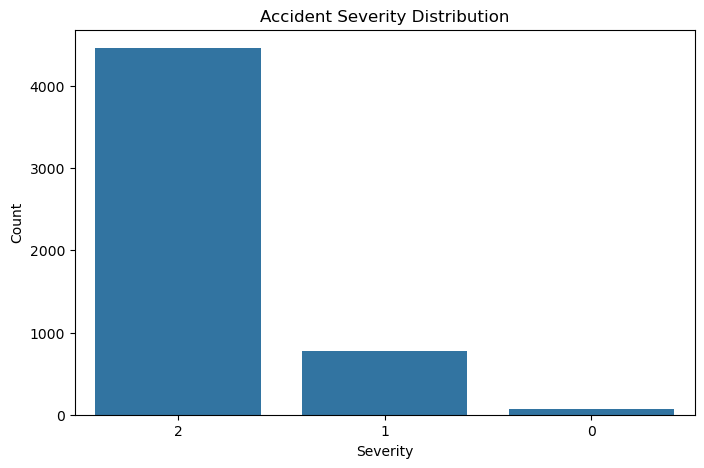

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x="Accident_Severity", order=data_cleaned["Accident_Severity"].value_counts().index)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

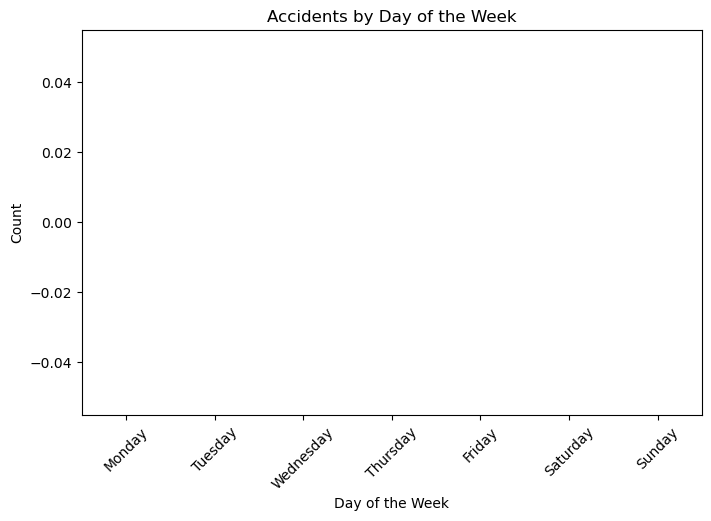

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x="Day_of_Week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


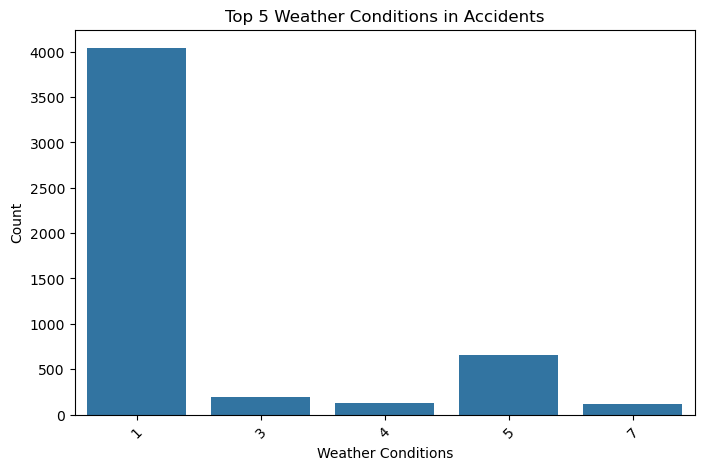

In [62]:
top_weather_conditions = data_cleaned["Weather_Conditions"].value_counts().nlargest(5).index
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned[data_cleaned["Weather_Conditions"].isin(top_weather_conditions)], x="Weather_Conditions")
plt.title("Top 5 Weather Conditions in Accidents")
plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
